In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
#Loading the dataset
warnings.filterwarnings("ignore")
df = pd.read_csv('car_prices.csv')

#we can see the data by Head,tail,shape etc.,
df.tail()
#print = (df.shape)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
1494,2012,Jaguar,XJ,Base,Sedan,automatic,sajwa1cb2clv28735,ca,25.0,22095,black,black,jpmorgan chase bank n.a.,39300,35000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
1495,2012,Lexus,ES 350,Base,Sedan,automatic,jthbk1eg6c2490790,ca,25.0,8055,gold,tan,lexus financial services,24700,23500,Tue Dec 30 2014 00:00:00 GMT-0800 (PST)
1496,2012,Jaguar,XF,Portfolio,Sedan,automatic,sajwa0hb3cls59258,ca,35.0,48806,black,black,walters auto sales/service inc,29000,28500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1497,2012,Mazda,Mazda3,i Touring,Sedan,manual,jm1bl1v89c1673274,ca,42.0,28481,white,black,bmw of riverside,10750,9600,Tue Dec 23 2014 12:30:00 GMT-0800 (PST)
1498,2012,Kia,Soul,Base,Wagon,automatic,kndjt2a57c7389362,ca,48.0,22047,white,black,kia motors america inc,10250,12100,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [121]:
df.count()

year            1499
make            1492
model           1491
trim            1492
body            1471
transmission    1446
vin             1499
state           1499
condition       1454
odometer        1499
color           1498
interior        1498
seller          1499
mmr             1499
sellingprice    1499
saledate        1499
dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1499 non-null   int64  
 1   make          1492 non-null   object 
 2   model         1491 non-null   object 
 3   trim          1492 non-null   object 
 4   body          1471 non-null   object 
 5   transmission  1446 non-null   object 
 6   vin           1499 non-null   object 
 7   state         1499 non-null   object 
 8   condition     1454 non-null   float64
 9   odometer      1499 non-null   int64  
 10  color         1498 non-null   object 
 11  interior      1498 non-null   object 
 12  seller        1499 non-null   object 
 13  mmr           1499 non-null   int64  
 14  sellingprice  1499 non-null   int64  
 15  saledate      1499 non-null   object 
dtypes: float64(1), int64(4), object(11)
memory usage: 187.5+ KB


In [123]:
df.shape

(1499, 16)

In [124]:
df.isnull().sum()

year             0
make             7
model            8
trim             7
body            28
transmission    53
vin              0
state            0
condition       45
odometer         0
color            1
interior         1
seller           0
mmr              0
sellingprice     0
saledate         0
dtype: int64

In [125]:
#Cleaning and filling the data using stistical methods
#Any of the methods from mean, median and mode can apply for instance I took Mode
fill_methods = {

    'make': 'Mean',

    'model': 'Mean',

    'trim': 'Mean',

    'body': 'Mean',

    'transmission': 'Mean',

}

for column, method in fill_methods.items():

    if method == 'Mode':

        df[column].fillna(df[column].median(), inplace=True)

    elif method == 'Mean':

        df[column].fillna(df[column].mode()[0], inplace=True)


In [126]:
#drop the um
df = df.dropna(subset=['saledate', 'sellingprice', 'mmr', 'make', 'color', 'interior', 'condition'])

In [127]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


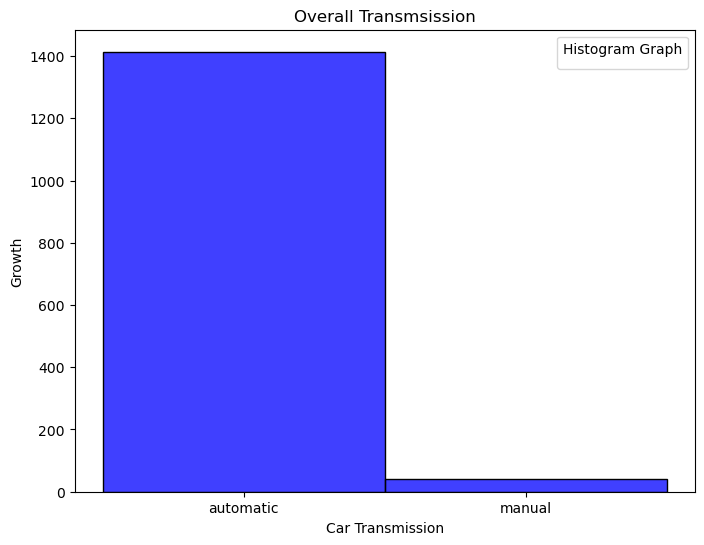

In [128]:
# Plotting a  histogram 
plt.figure(figsize=(8, 6))
sns.histplot(df['transmission'], color = 'blue')
plt.xlabel('Car Transmission')
plt.ylabel('Growth')
plt.title('Overall Transmsission')
plt.legend(title='Histogram Graph')
plt.show()

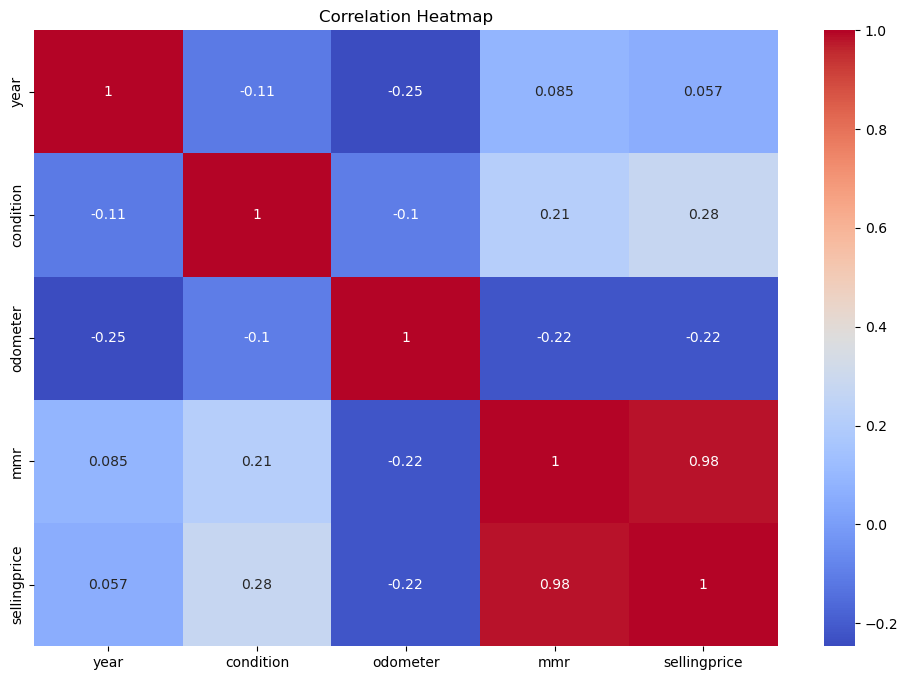

In [129]:
#Creating a heat map
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

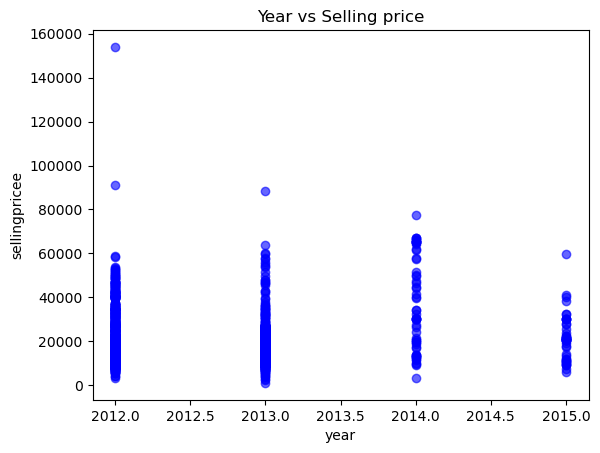

In [131]:
# Creating a scatter plot 
plt.scatter(df['year'], df['sellingprice'],color='blue', alpha=0.6)
plt.xlabel('year')
plt.ylabel('sellingpricee')
plt.title('Year vs Selling price')
plt.show()